<a href="https://colab.research.google.com/github/panghanwu/machine_learning_Elwing/blob/main/multilayer_perceptron_mnist2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist)
可用來檢測模型好壞的資料開放資料集

In [44]:
"""load dataset"""
from tensorflow.keras.datasets.fashion_mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [45]:
trains = [
      'T-shirt', 
      'Trouser',
      'Pullover',
      'Dress',
      'Coat',
      'Sandal',
      'Shirt',
      'Sneaker',
      'Bag',
      'Ankle boot'    
]

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


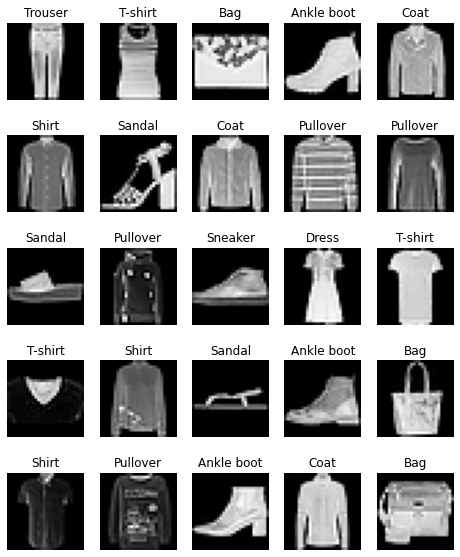

In [46]:
"""view dataset"""
import matplotlib.pyplot as plt
import random

plt.figure(figsize=(8,10))
for i in range(5):
  for j in range(5):
    idx = random.randint(0, 59999)
    title = trains[y_train[idx]]
    plt.subplot(5,5,5*i+j+1)
    plt.title(title)
    plt.axis('off')
    plt.imshow(x_train[idx], 'gray')

In [47]:
"""data preprocessing"""
# flatten
x_train_norm = x_train.reshape(-1, 784)/255.
x_test_norm = x_test.reshape(-1, 784)/255.

# 'to_categorical' consumes too much RAM
# use SparseCategoricalCrossentropy

In [48]:
"""build model"""
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

layers = [
      Dense(512, activation='relu', input_dim=784),
      Dropout(0.25),
      Dense(256, activation='relu'),
      Dropout(0.25),
      Dense(10, activation='softmax')
]

model = Sequential(layers)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [49]:
"""training!"""
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model.compile(loss=SparseCategoricalCrossentropy(),
       optimizer=Adam(),
       metrics=['accuracy'])

callbacks = [
        ModelCheckpoint('model.h5', save_best_only=True),
        EarlyStopping(patience=5, restore_best_weights=True)
]

model.fit(x_train_norm,
     y_train,
     batch_size=200,
     epochs=50,
     callbacks=callbacks,
     validation_split=0.1)

Epoch 1/50
270/270 [==============================] - 4s 16ms/step - loss: 0.5866 - accuracy: 0.7924 - val_loss: 0.4086 - val_accuracy: 0.8562
Epoch 2/50
270/270 [==============================] - 4s 15ms/step - loss: 0.4032 - accuracy: 0.8553 - val_loss: 0.3552 - val_accuracy: 0.8675
Epoch 3/50
270/270 [==============================] - 4s 16ms/step - loss: 0.3694 - accuracy: 0.8654 - val_loss: 0.3474 - val_accuracy: 0.8762
Epoch 4/50
270/270 [==============================] - 4s 15ms/step - loss: 0.3404 - accuracy: 0.8742 - val_loss: 0.3301 - val_accuracy: 0.8755
Epoch 5/50
270/270 [==============================] - 4s 15ms/step - loss: 0.3241 - accuracy: 0.8807 - val_loss: 0.3399 - val_accuracy: 0.8752
Epoch 6/50
270/270 [==============================] - 4s 15ms/step - loss: 0.3131 - accuracy: 0.8845 - val_loss: 0.3375 - val_accuracy: 0.8758
Epoch 7/50
270/270 [==============================] - 4s 15ms/step - loss: 0.3017 - accuracy: 0.8871 - val_loss: 0.3130 - val_accuracy: 0.8868

In [50]:
"""testing"""
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3136 - accuracy: 0.8872


[0.31356847286224365, 0.8871999979019165]

In [51]:
"""confusion matrix"""
from sklearn.metrics import confusion_matrix
import pandas as pd

pre = model.predict_classes(x_test_norm)
mat = confusion_matrix(y_test, pre)
pd.DataFrame(mat,
       index=["{} (Org)".format(n) for n in trains],
       columns=["{} (Pre)".format(n) for n in trains])

,T-shirt (Pre),Trouser (Pre),Pullover (Pre),Dress (Pre),Coat (Pre),Sandal (Pre),Shirt (Pre),Sneaker (Pre),Bag (Pre),Ankle boot (Pre)
T-shirt (Org),899,2,16,16,3,1,62,0,1,0
Trouser (Org),4,967,1,22,4,0,2,0,0,0
Pullover (Org),20,1,821,15,105,0,37,0,1,0
Dress (Org),36,5,8,907,28,0,14,0,2,0
Coat (Org),0,1,93,40,827,0,37,0,2,0
Sandal (Org),0,0,0,1,0,971,0,17,1,10
Shirt (Org),179,0,102,33,78,0,602,0,6,0
Sneaker (Org),0,0,0,0,0,23,0,960,0,17
Bag (Org),10,0,6,4,4,2,5,2,967,0
Ankle boot (Org),0,0,0,0,0,9,1,39,0,951


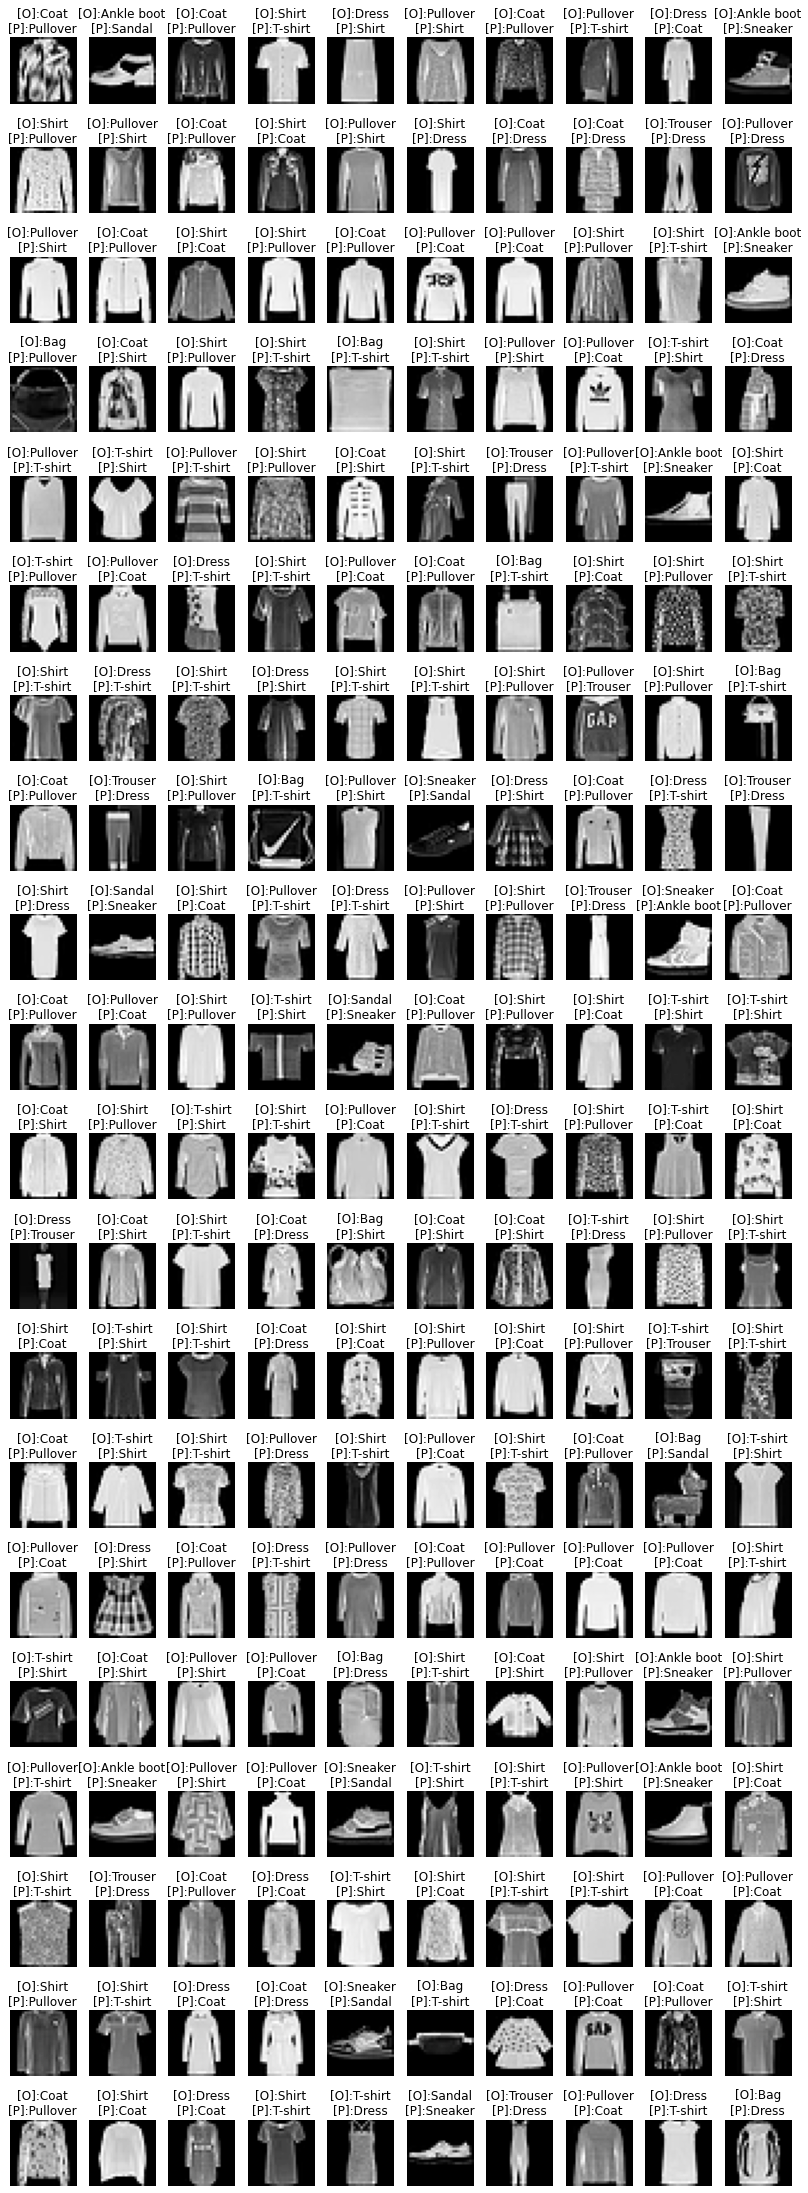

In [52]:
"""error table"""
import numpy as np

idx = np.nonzero(pre != y_test)[0]
idx = idx[:200]
false_img = x_test[idx]
false_label = y_test[idx]
false_pre = pre[idx]

plt.figure(figsize=(14,42))
width = 10
height = len(false_img) // width + 1
for i in range(len(false_img)):
  plt.subplot(height, width, i+1)
  title = '[O]:{}\n[P]:{}'.format(trains[false_label[i]], trains[false_pre[i]])
  plt.title(title)
  plt.axis('off')
  plt.imshow(false_img[i], 'gray')

T-shirt 的機率為 0.164
Trouser 的機率為 0.624
Pullover 的機率為 0.059
Dress 的機率為 0.052
Coat 的機率為 0.02
Sandal 的機率為 0.0
Shirt 的機率為 0.068
Sneaker 的機率為 0.001
Bag 的機率為 0.011
Ankle boot 的機率為 0.001


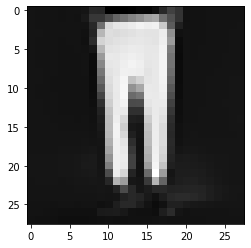

In [53]:
"""apply"""
import PIL
import PIL.ImageOps  
# need test image file
fn = 'test3.jpg'
img = PIL.Image.open(fn).convert('L').resize((28,28))
img = PIL.ImageOps.invert(img)
img_np = np.array(img)
test = img_np.reshape(1,784) / 255 
probs = model.predict(test)[0]
for i, p in enumerate(probs):
  print(trains[i], '的機率為', round(p,3))
plt.imshow(img_np, 'gray')
